In [1]:
import pandas as pd
from tabulate import tabulate
import os
from pathlib import Path
import matplotlib.pyplot as plt
import scipy
import math
import numpy as np
import statistics 

list_categories_str = [ "contribution", "strengths", "weakness", "reproducibility", "detailed", "justifictation" ]

In [2]:
output_directory = "../miccai2023/"
path_words_count = output_directory + "count_words.csv"
df_words = pd.read_csv(path_words_count, sep= "\t",  header=[0, 1], index_col=[0,1], skip_blank_lines=True)

In [3]:
for id, id_df in df_words.groupby(level=0):
    for _, title in id_df.index.values:
        for i in range (1,4):
            df_words.loc[(id,title), ("total", f"review {i}")] = 0
                    
        for category in list_categories_str :
            for i in range (1,4):
                if math.isnan(df_words.loc[(id,title), (category, f"review {i}")]):
                    df_words.loc[(id,title), (category, f"review {i}")] = 0
                df_words.loc[(id,title), ("total", f"review {i}")] += df_words.loc[(id,title), (category, f"review {i}")]
                            
df_words.sort_index(axis = 1, ascending=True, inplace=True)
df_words.to_csv(os.path.join(output_directory ,f'count_words_total.csv'), index = True, sep="\t", encoding='utf-8')
    

In [16]:


df_resume = pd.DataFrame(columns=["category","mean","max", "min", "median", "std", "iqr"])
df_resume.set_index(["category"], inplace= True)

for category in list_categories_str + ["total"]:
        list_words = df_words.loc[:,(category, "review 1")].values.tolist() + df_words.loc[:,(category, "review 2")].values.tolist() + df_words.loc[:,(category, "review 3")].values.tolist()
        newlist = [x for x in list_words if math.isnan(x) == False]
        df_resume.loc[(category), "mean"] = round(np.mean(newlist), 2)
        df_resume.loc[(category), "median"] = np.median(newlist)
        df_resume.loc[(category), "max"] = max(newlist)
        df_resume.loc[(category), "min"] = min(newlist)
        df_resume.loc[(category), "std"] = round(np.std(newlist), 2)
        df_resume.loc[(category), "iqr"] = scipy.stats.iqr(newlist)
        deciles_ = statistics.quantiles(newlist, n=10)
        for i in range(9):
                df_resume.loc[(category), f"deciles {i + 1}"] = deciles_[i]

print(tabulate(df_resume, headers='keys', tablefmt='psql'))
#print(tabulate(df_resume, headers='keys', tablefmt='latex'))


+-----------------+--------+-------+-------+----------+--------+-------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| category        |   mean |   max |   min |   median |    std |   iqr |   deciles 1 |   deciles 2 |   deciles 3 |   deciles 4 |   deciles 5 |   deciles 6 |   deciles 7 |   deciles 8 |   deciles 9 |
|-----------------+--------+-------+-------+----------+--------+-------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------|
| contribution    |  55.16 |   162 |     0 |       50 |  28.39 |    36 |          24 |          32 |          37 |          43 |          50 |          57 |          66 |          76 |          93 |
| strenghts       |  49.38 |   302 |     0 |       42 |  33.28 |    36 |          17 |          24 |          30 |          36 |          42 |          49 |          58 |          70 |          90 |
| wea

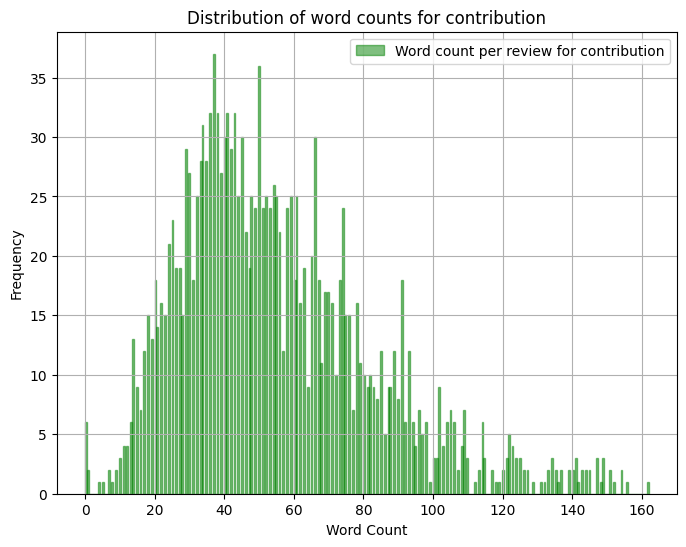

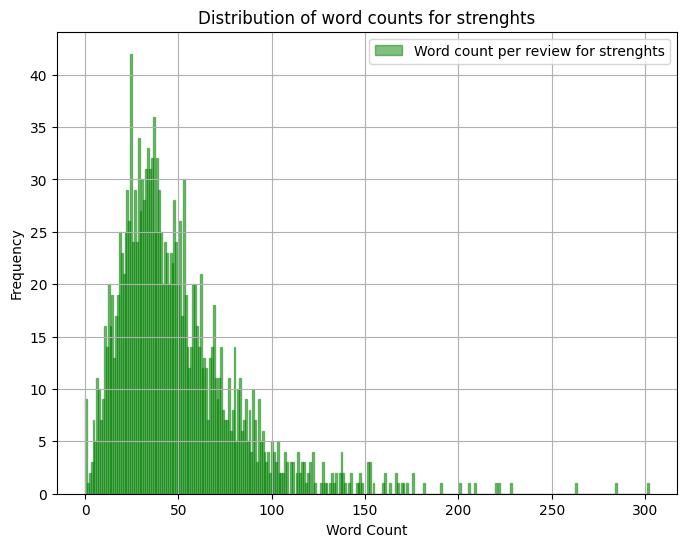

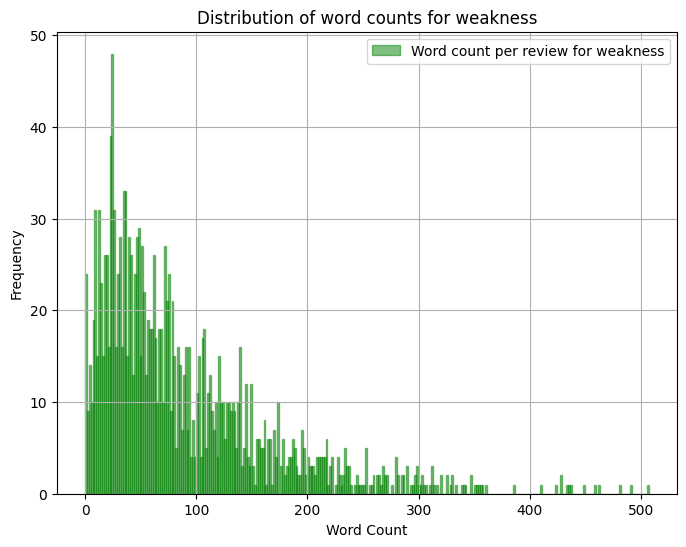

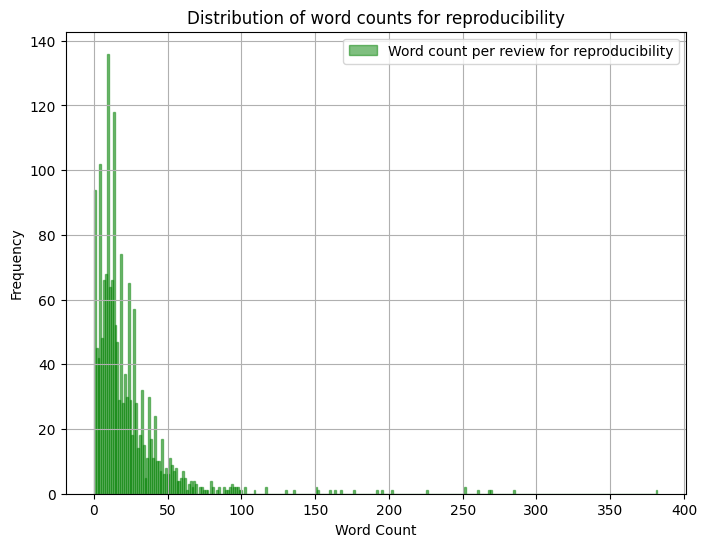

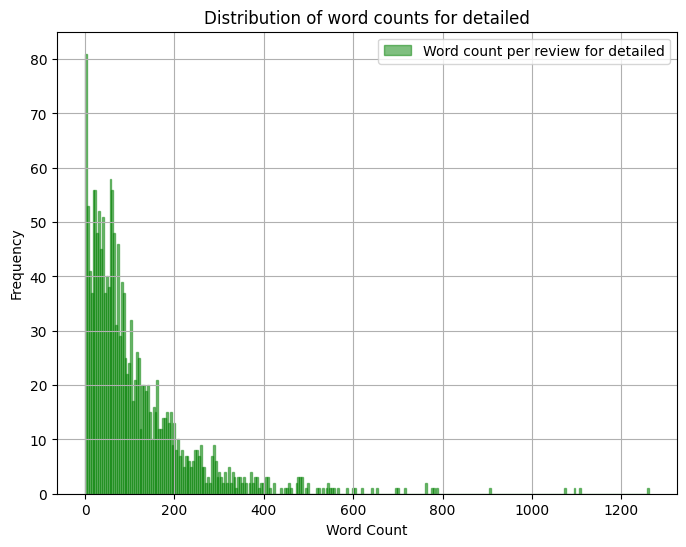

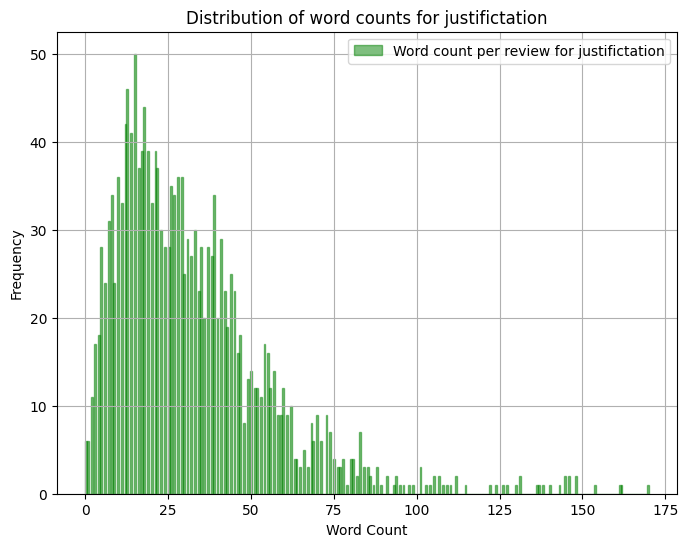

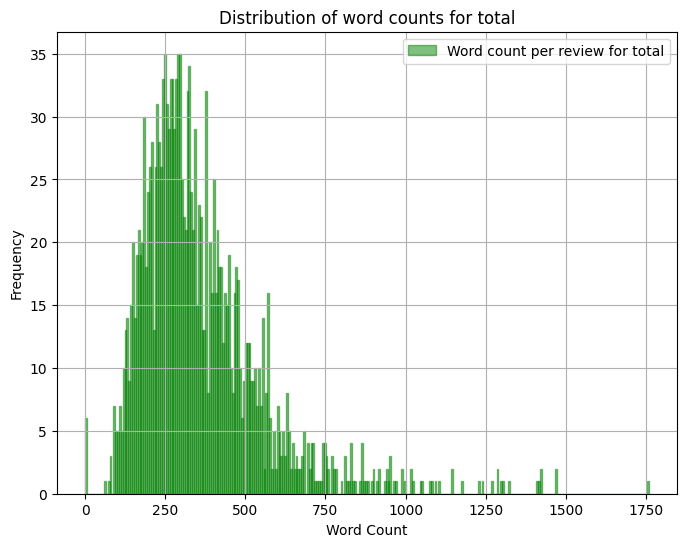

In [60]:
histo_path = Path(output_directory) / "histo"
if not histo_path.is_dir():
    os.mkdir(histo_path)

for category in list_categories_str + ["total"] :

    list = df_words.loc[:,(category, "review 1")].values.tolist() + df_words.loc[:,(category, "review 2")].values.tolist() + df_words.loc[:,(category, "review 3")].values.tolist()

    plt.figure(figsize=(8, 6))
    plt.hist(list, bins=300, alpha=0.5, edgecolor='g', color='g', label=f"Word count per review for {category}")

    plt.title(f'Distribution of word counts for {category}')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(histo_path, f"{category}_hist_count_words"))

In [18]:
output_directory = "../miccai2023/"
path_repro_check= output_directory + "reproducibility_checklist_reviews.csv"
df_chek = pd.read_csv(path_words_count, sep= "\t",  header=[0, 1], index_col=[0,1], skip_blank_lines=True)



id                                                                            title  \
020-Paper2659                                                    Unnamed: 2_level_1   
030-Paper3722 A Texture Neural Network to Predict the Abnorma...                NaN   
037-Paper1541 Accurate multi-contrast MRI super-resolution vi...                NaN   
040-Paper2061 Acute Ischemic Stroke Onset Time Classification...                NaN   
047-Paper0340 Adult-like Phase and Multi-scale Assistance for...                NaN   
059-Paper3355 An Interpretable and Attention-based Method for...                NaN   
...                                                                             ...   
695-Paper1729 Unsupervised Discovery of 3D Hierarchical Struc...                NaN   
708-Paper2976 VISA-FSS: A Volume-Informed Self Supervised App...                NaN   
709-Paper2328 Vision Transformer based Multi-Class Lesion Det...                NaN   
712-Paper3421 vox2vec: A Framework for Self

In [ ]:
repro_list = df_words.loc[:,("reproducibility", "review 1")].values.tolist() + df_words.loc[:,("reproducibility", "review 2")].values.tolist() + df_words.loc[:,("reproducibility", "review 3")].values.tolist()
total_list = df_words.loc[:,("total", "review 1")].values.tolist() + df_words.loc[:,("total", "review 2")].values.tolist() + df_words.loc[:,("total", "review 3")].values.tolist()

res_tt = scipy.stats.ttest_ind(repro_list, total_list)

print(f"For the {len(repro_list)} reviews, t-test results between the lenght of the total review and the lenght of the reproducibility review:")
print("statistics:",res_tt.statistic)
print("pvalue:", res_tt.pvalue)
print("df:", res_tt.df)